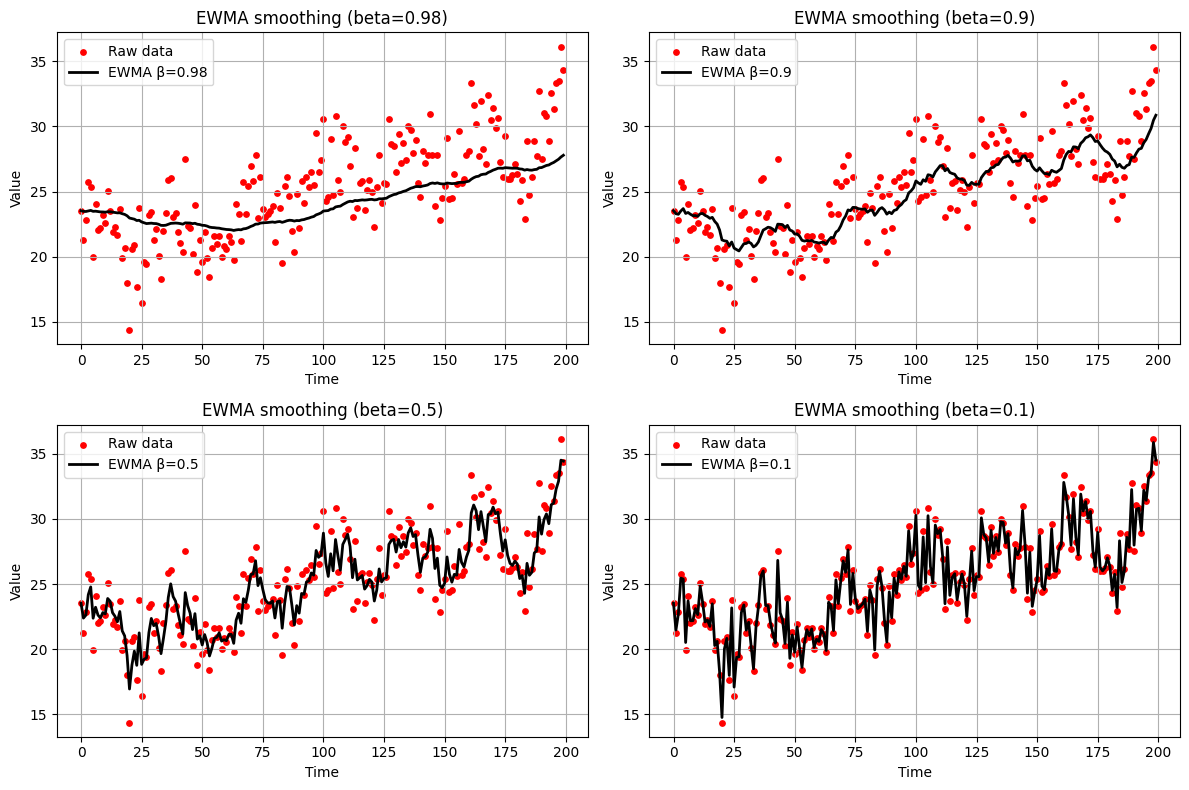

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(0)

# ---- Generate noisy "stock-like" data ----
T = 200
time = np.arange(T)
trend = 0.05 * time         # upward trend
season = 2 * np.sin(0.2 * time)  # oscillation
noise = np.random.normal(scale=2.0, size=T)  # noise
data = 20 + trend + season + noise  # final series

# ---- EWMA using TensorFlow ----
def ewma_tf(x, beta):
    x_t = tf.constant(x, dtype=tf.float32)
    s = tf.TensorArray(tf.float32, size=len(x))
    s = s.write(0, x_t[0])  # initial value = first point
    prev = x_t[0]

    for i in range(1, len(x)):
        prev = beta * prev + (1 - beta) * x_t[i]
        s = s.write(i, prev)

    return s.stack().numpy()

# Different beta values for smoothing
betas = [0.98, 0.9, 0.5, 0.1]
results = {b: ewma_tf(data, b) for b in betas}

# ---- Plot like in your screenshot ----
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, b in enumerate(betas):
    axes[i].scatter(time, data, color='red', s=15, label="Raw data")
    axes[i].plot(time, results[b], color='black', linewidth=2, label=f"EWMA β={b}")
    axes[i].set_title(f"EWMA smoothing (beta={b})")
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Value")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()
